In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns

Не забудьте скачать [данные](https://1drv.ms/u/c/a320c9b39dd5bde2/EZXNB1leZnRFpsAYSpmz0_cBlmmT4FbiKxcwov1ehM5d6Q): в директории `./data/` должны находиться файлы `users.csv`, `appeals.csv`, `navigation.csv`

In [2]:
appeals_init = pd.read_csv("./data/appeals.csv", index_col=0)
N_init = appeals_init.shape[0]

Общее изучение обращений

In [3]:
appeals = appeals_init.copy()
# Не будем анализировать данные с пропусками
appeals = appeals.dropna()
N = appeals.shape[0]

In [4]:
print(f"Данные с пропусками составляют {round(100 * (N_init - N) / N_init, 2)} %")

Данные с пропусками составляют 0.63 %


In [5]:
print(f"Среднее число запросов на одного пользователя: {round(appeals["question_id"].shape[0] / len(set(appeals['user_id'].values)), 2)}")

Среднее число запросов на одного пользователя: 1.53


In [6]:
# req - количество обращений, которые выполнил конкретный пользователь
req = appeals.groupby("user_id")["question_id"].size()
    
print(f"Количество пользователей, обратившихся в службу поддержки 1 раз: {(req == 1).sum()}")
print(f"Наибольшее количество обращений одного пользователя: {req.max()}")


Количество пользователей, обратившихся в службу поддержки 1 раз: 275747
Наибольшее количество обращений одного пользователя: 203


In [7]:
# np_num_requests - количество пользователей, которые сделали 
# обращались в поддержку конкретное количество раз
np_num_requests = req.value_counts().sort_index().reindex(
    range(req.max() + 1), fill_value=0).values

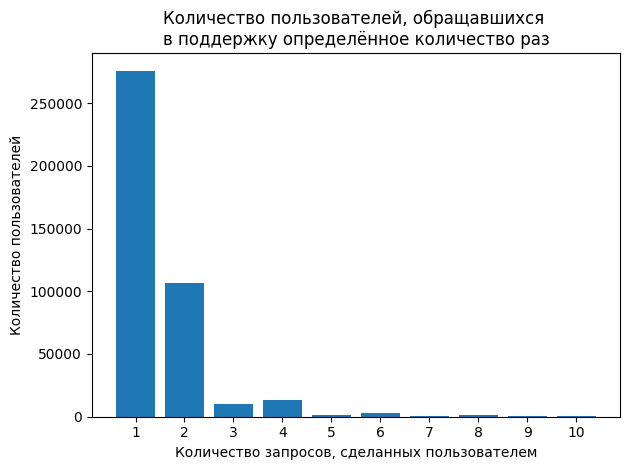

In [8]:
# Нас интересуют пользователи, сделавшие до 10 обращений

# Количество пользователей, обращавшихся в поддержку определённое количество раз
plt.bar([i + 1 for i in range(10)], np_num_requests[1:10 + 1])

plt.xlabel("Количество запросов, сделанных пользователем")
plt.ylabel("Количество пользователей")
plt.title("Количество пользователей, обращавшихся \nв поддержку определённое количество раз")
ax = plt.gca()
ax.set_xticks([i + 1 for i in range(10)])

plt.tight_layout()

In [9]:
appeals["created_time"] = pd.to_datetime(appeals["created_time"])

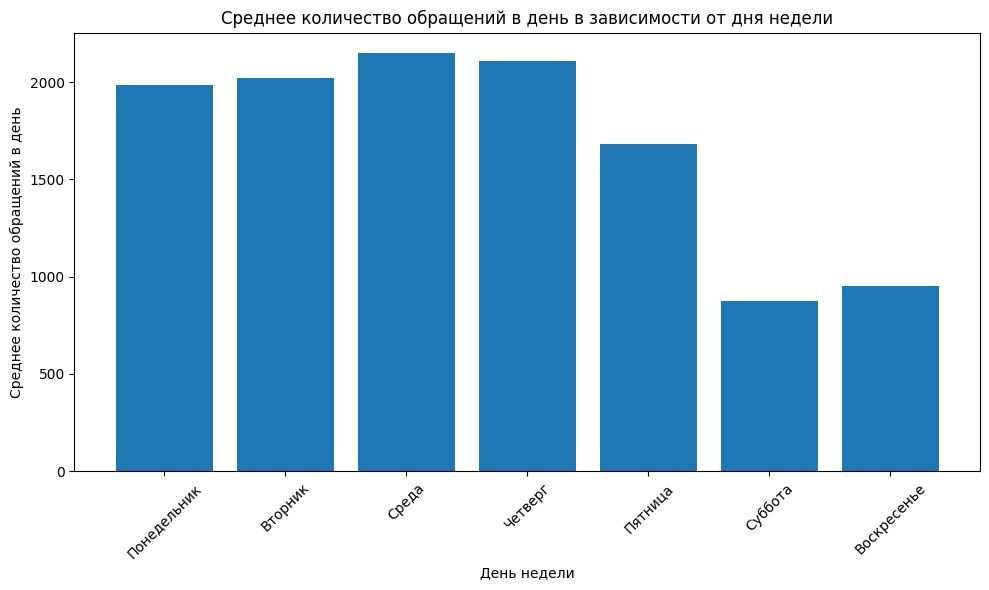

In [10]:
# Среднее количество обращений в день в зависимости от дня недели
# Т.к. по некоторым месяцам у нас данные неполные, то будем строить графики для
# среднего количества запросов в день (а не общее количество запросов, сделанных в этот день недели)

appeals["date"] = appeals["created_time"].dt.date
appeals["weekday"] = appeals["created_time"].dt.weekday
weekly_avg = appeals.groupby("weekday")["date"].agg(lambda x: x.value_counts().mean()).sort_index()
week_names = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
plt.figure(figsize=(10, 6))
plt.bar(week_names, weekly_avg)
plt.xlabel('День недели')
plt.ylabel('Среднее количество обращений в день')
plt.title("Среднее количество обращений в день в зависимости от дня недели")
plt.xticks(rotation=45)

plt.tight_layout()

Изучим основные характеристики пользователей в зависимости от месяца

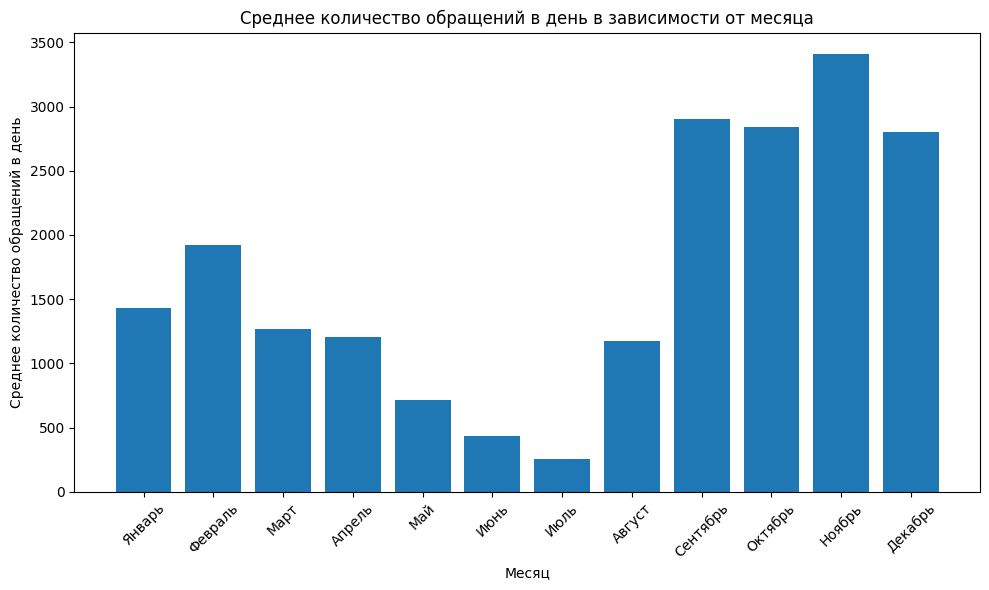

In [11]:
# Среднее количество обращений в день в зависимости от месяца
# Т.к. по некоторым месяцам у нас данные неполные, то будем строить графики для
# среднего количества запросов в день (а не общее количество запросов в этом месяце)

appeals["month"] = appeals["created_time"].dt.month
monthly_avg = appeals.groupby("month")["date"].agg(lambda x: x.value_counts().mean()).sort_index()
month_names = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
               'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_avg)
plt.xlabel('Месяц')
plt.ylabel('Среднее количество обращений в день')
plt.title("Среднее количество обращений в день в зависимости от месяца")
plt.xticks(rotation=45)

plt.tight_layout()

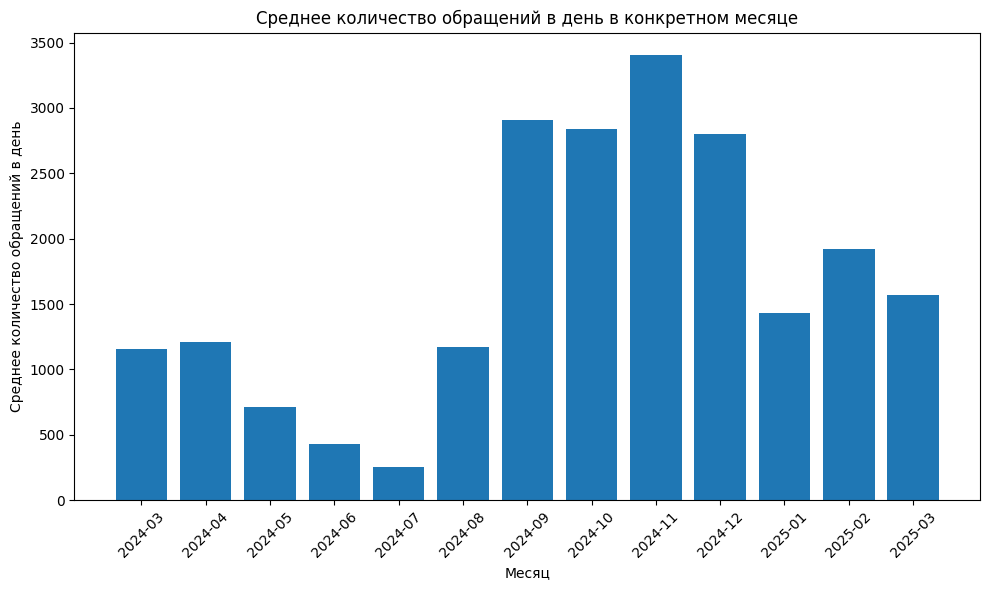

In [12]:
# Среднее количество обращений в день в конкретном месяце
# Bar-версия
# Т.к. по некоторым месяцам у нас данные неполные, то будем строить графики для
# среднего количества запросов в день (а не общее количество запросов в этом месяце)

appeals["M"] = appeals["created_time"].dt.strftime("%Y-%m")
M_avg = appeals.groupby("M")["date"].agg(lambda x: x.value_counts().mean()).sort_index()
plt.figure(figsize=(10, 6))
plt.bar(M_avg.index, M_avg.values)
plt.xlabel('Месяц')
plt.ylabel('Среднее количество обращений в день')
plt.title('Среднее количество обращений в день в конкретном месяце')
plt.xticks(rotation=45)

plt.tight_layout()

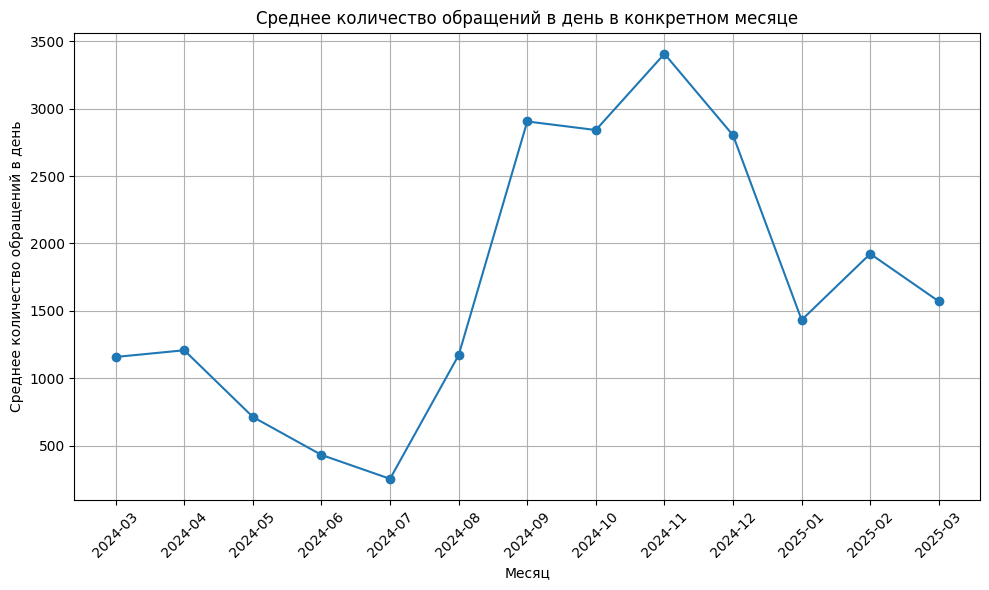

In [13]:
# Среднее количество обращений в день в конкретном месяце
# Plot-версия
# Т.к. по некоторым месяцам у нас данные неполные, то будем строить графики для
# среднего количества запросов в день (а не общее количество запросов в этом месяце)

appeals["M"] = appeals["created_time"].dt.strftime("%Y-%m")
M_avg = appeals.groupby("M")["date"].agg(lambda x: x.value_counts().mean()).sort_index()
plt.figure(figsize=(10, 6))
plt.plot(M_avg.index, M_avg.values, linestyle='-', marker='o')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество обращений в день')
plt.title('Среднее количество обращений в день в конкретном месяце')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

Теперь изучим основные характеристики пользователей в зависимости от недели (это поможет точнее выявить сезонные отклонения)

In [14]:
# Ищем первый день, по которому полные данные
week_min = appeals["created_time"].min()

In [15]:
# Ищем первый понедельник, по которому есть полная информация
week_min = week_min + pd.DateOffset(days=(6 - week_min.weekday()) % 7 + 1)  

In [16]:
# Ищем последний день, по которому есть полные данные
week_max = appeals["created_time"].max()

In [17]:
# Ищем последний понедельник, до которого (не включительно) есть полные данные
week_max = week_max - pd.DateOffset(days=week_max.weekday())

In [18]:
print(f"Между неделей {week_min.strftime('%Y-%m-%d')} (включительно) и неделей {week_max.strftime('%Y-%m-%d')} (не включительно)")

Между неделей 2024-03-04 (включительно) и неделей 2025-03-10 (не включительно)


In [19]:
# Оставляем только полные данные
appeals = appeals[(appeals['created_time'] >= week_min) & (appeals['created_time'] < week_max)]

In [20]:
# Неделя, в которой было обращение
appeals['week'] = (appeals['created_time'] - week_min).dt.days // 7

In [21]:
def format_dates(num):
    d1 = week_min + pd.DateOffset(weeks=num)
    d2 = week_min + pd.DateOffset(weeks=num + 1) - pd.DateOffset(nanoseconds=1)
    
    months = ['янв', 'фев', 'март', 'апр', 'май', 'июнь',
              'июль', 'авг', 'сен', 'окт', 'нояб', 'дек']

    day1 = d1.day
    day2 = d2.day
    month1 = months[d1.month - 1]
    month2 = months[d2.month - 1]
    year1 = d1.year
    year2 = d2.year

    if year1 == year2:
        if d1.month == d2.month:
            return f'{day1} - {day2} {month1} {year1}'
        else:
            return f'{day1} {month1} - {day2} {month2} {year1}'
    else:
        return f'{day1} {month1} {year1} - {day2} {month2} {year2}'

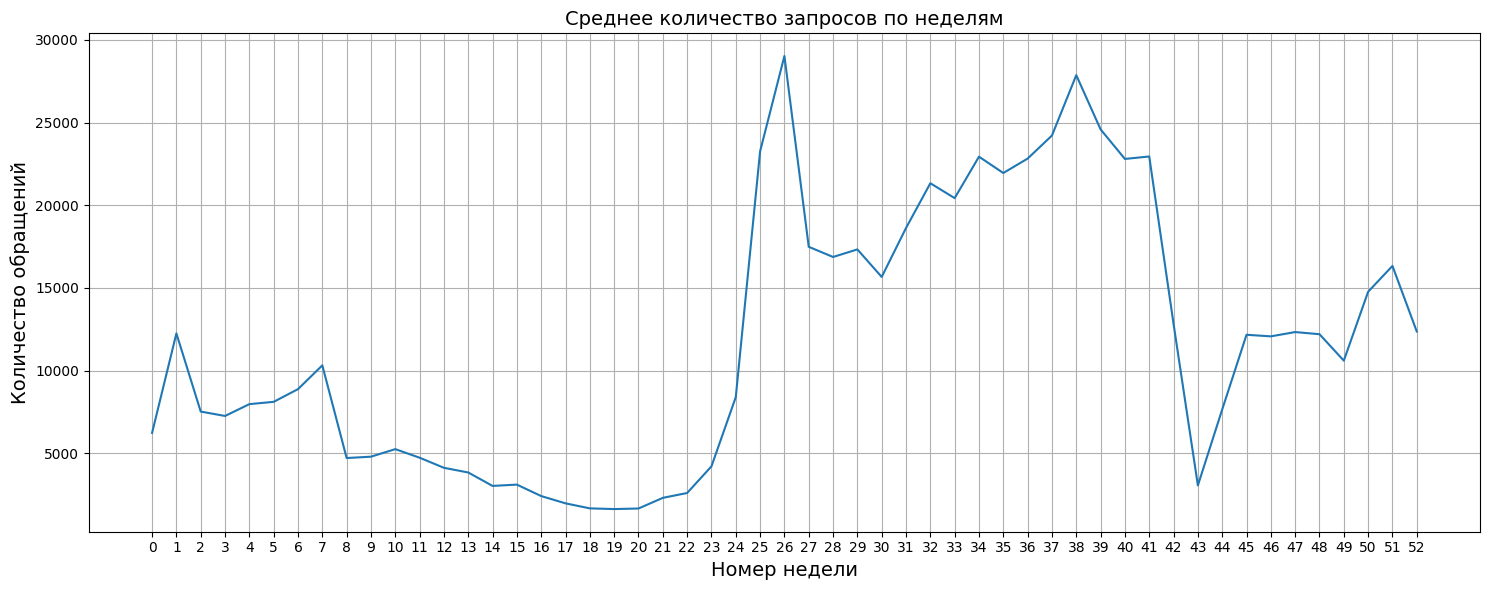

In [22]:
# Среднее количество запросов по неделям
# plot-версия, #1

plt.figure(figsize=(15, 6))
plt.grid(which='major')
num_weekly_requests = appeals.groupby(['week']).size().groupby('week').sum().reset_index(name='num')
plt.plot(num_weekly_requests['week'], num_weekly_requests['num'], linestyle='-')
plt.xlabel('Номер недели', fontsize=14)
plt.xticks(num_weekly_requests['week'])
plt.ylabel('Количество обращений', fontsize=14)
plt.title('Среднее количество запросов по неделям', fontsize=14)
plt.tight_layout()

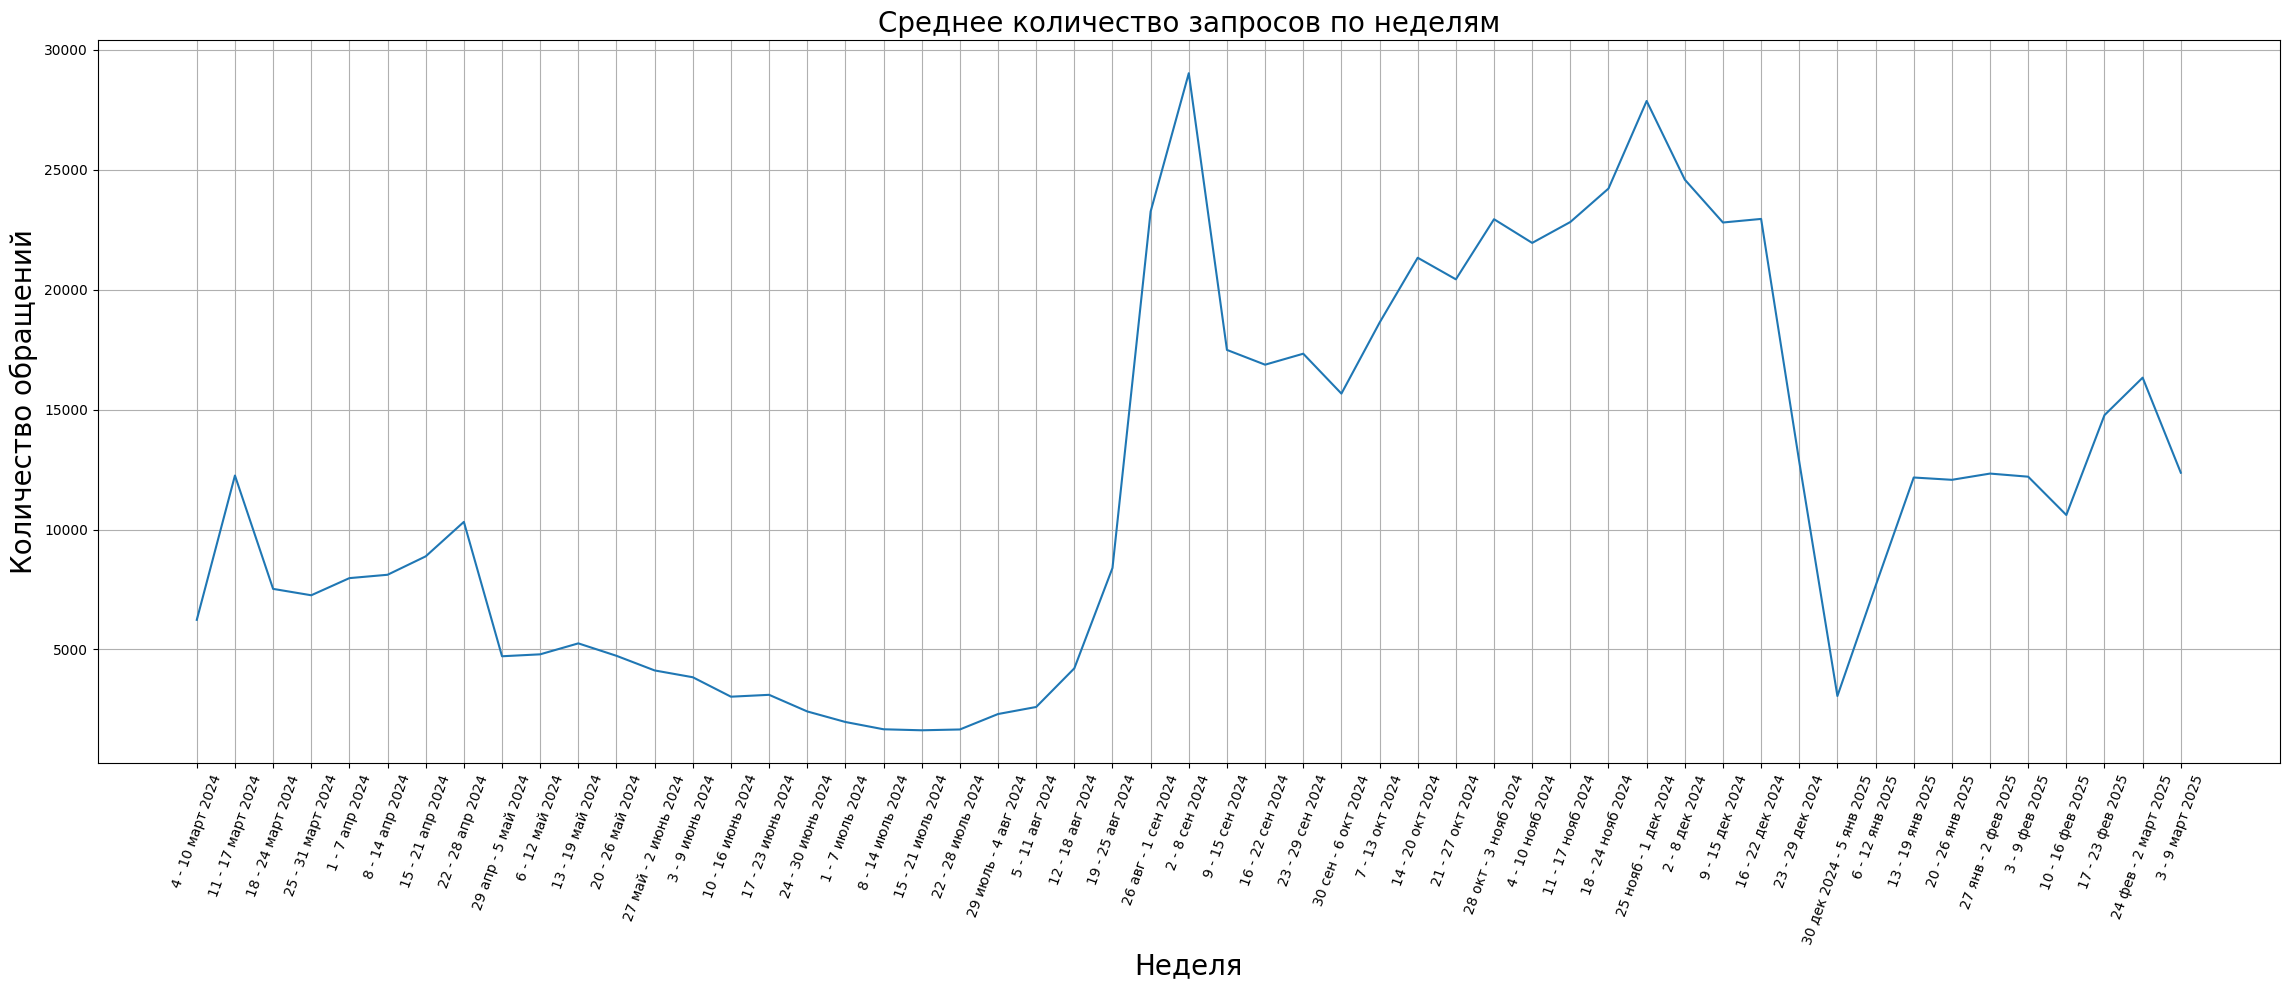

In [23]:
# Среднее количество запросов по неделям
# plot-версия, #2

week_names = num_weekly_requests['week'].apply(format_dates).to_numpy()
plt.figure(figsize=(23, 10))
plt.plot(week_names, num_weekly_requests['num'], linestyle='-')
plt.xlabel('Неделя', fontsize=20)
plt.ylabel('Количество обращений', fontsize=20)
plt.title('Среднее количество запросов по неделям', fontsize=20)
plt.xticks(rotation=70)
plt.grid(True)
plt.tight_layout()

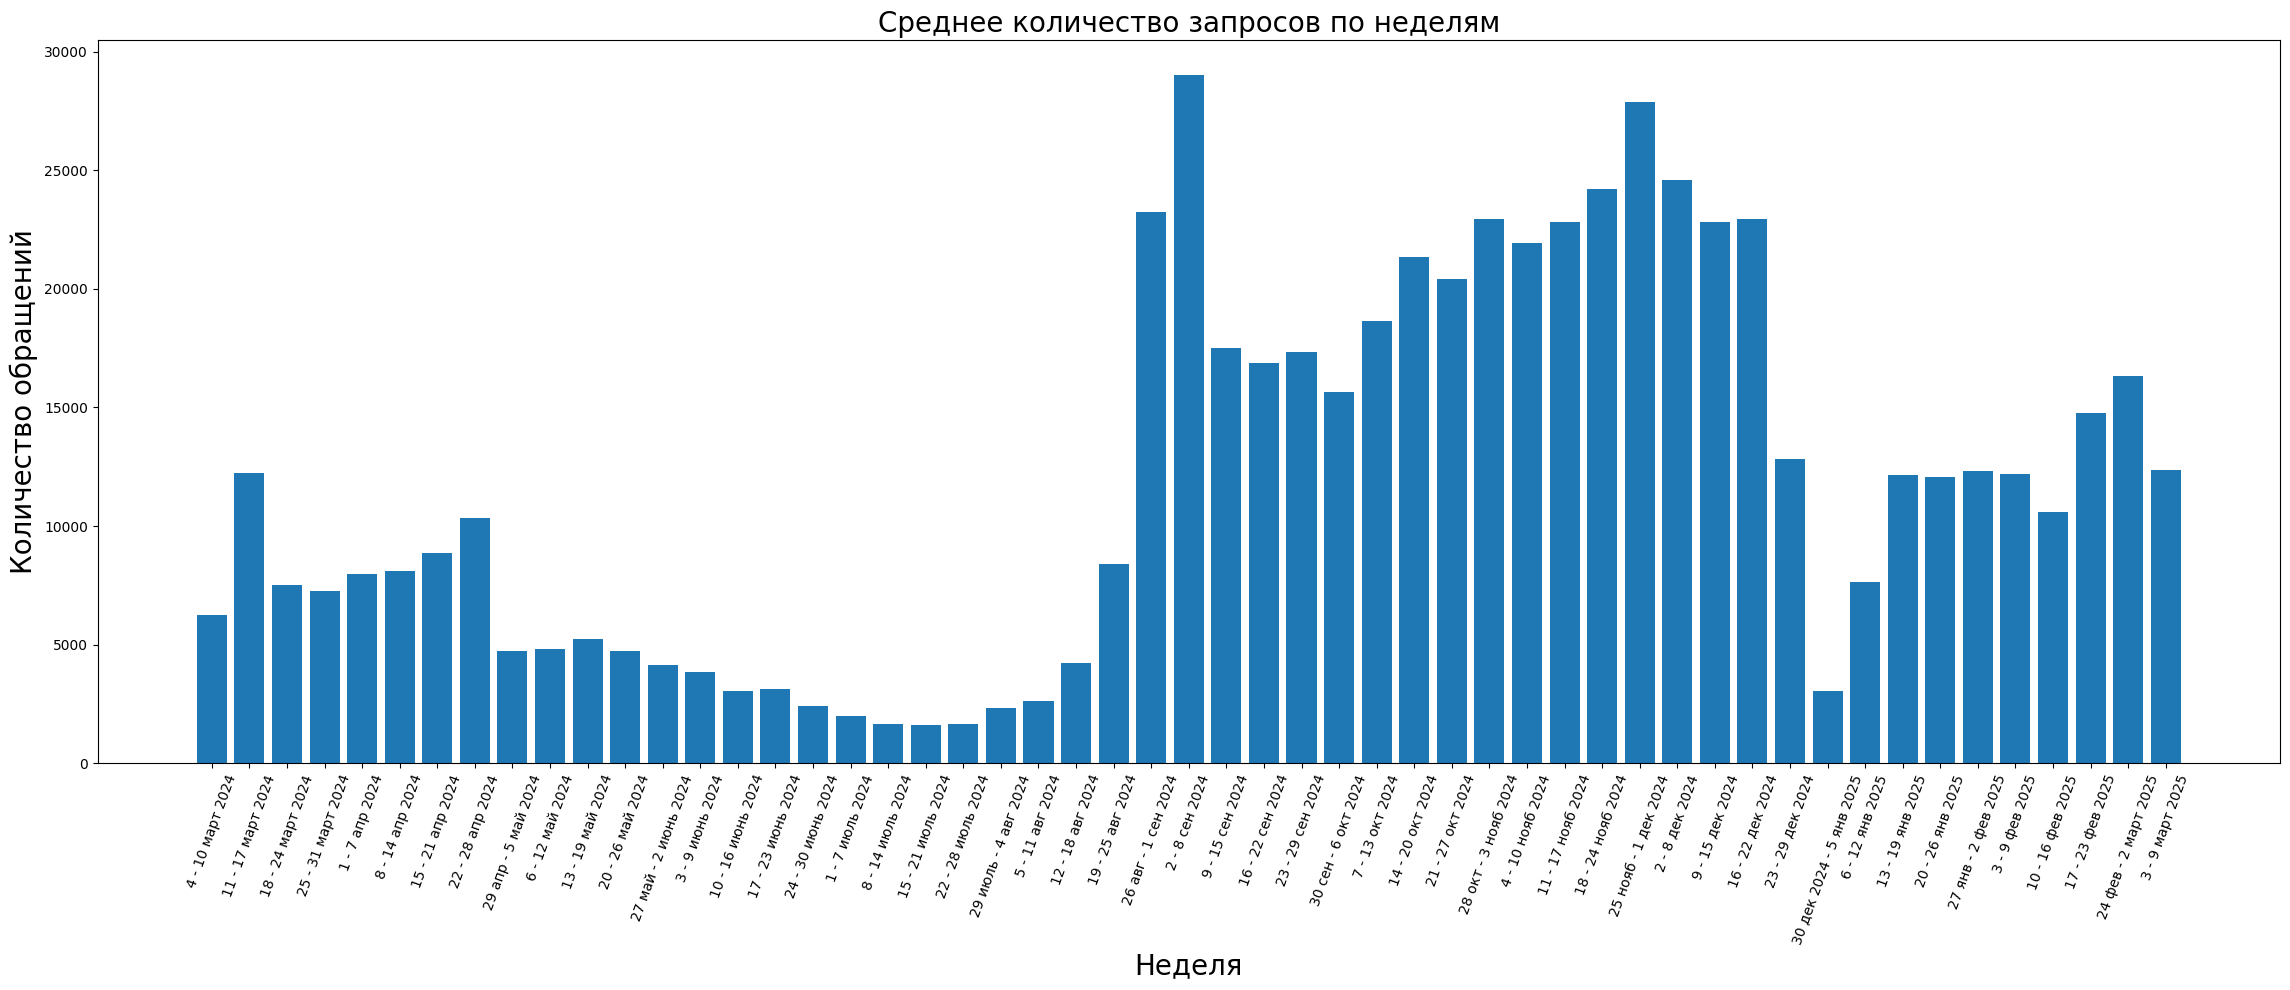

In [24]:
# Среднее количество запросов по неделям
# bar-версия

plt.figure(figsize=(23, 10))
plt.bar(week_names, num_weekly_requests['num'], linestyle='-')
plt.xlabel('Неделя', fontsize=20)
plt.ylabel('Количество обращений', fontsize=20)
plt.title('Среднее количество запросов по неделям', fontsize=20)
plt.xticks(rotation=70)
plt.tight_layout()

In [25]:
# Средняя оценка по неделям

Вычислим некоторые метрики

In [26]:
appeals["rate"] = appeals["rate"].map({"Очень плохо": 1, "Плохо": 2, "Нормально": 3, "Хорошо": 4, "Отлично": 5})

In [27]:
print(f"NPS = {round((appeals[appeals["ready_recommend"] >= 8].shape[0] -
                      appeals[appeals["ready_recommend"] <= 6].shape[0]) /
                      appeals.shape[0] * 100, 1)}")
print(f"CSAT = {round(appeals[appeals["rate"] >= 4].shape[0] /
                      appeals.shape[0] * 100, 1)}")

NPS = -9.3
CSAT = 69.7


In [28]:
# num_requests - количество запросов, которые сделал этот пользователь
appeals['num_requests'] = appeals['user_id'].map(req)
# num - номер этого запроса среди запросов данного пользователя
appeals['num'] = appeals.groupby('user_id')['created_time'].rank(method='first').astype(int)

In [29]:
# Отдельно пользователи, обратившиеся в поддержку ровно 1 раз
appealss_one = appeals[appeals["num_requests"] == 1]
# Отдельно пользователи, обращавшиеся в поддержку многократно
appealss_more = appeals[appeals["num_requests"] != 1]

In [30]:
print("Среди тех пользователей, которые обращались 1 раз")
print(f"NPS = {round((appealss_one[appealss_one["ready_recommend"] >= 8].shape[0] -
                      appealss_one[appealss_one["ready_recommend"] <= 6].shape[0]) /
                      appealss_one.shape[0] * 100, 1)}")
print(f"CSAT = {round(appealss_one[appealss_one["rate"] >= 4].shape[0] /
                      appealss_one.shape[0] * 100, 1)}")

Среди тех пользователей, которые обращались 1 раз
NPS = -9.1
CSAT = 69.5


In [31]:
print("Среди тех пользователей, которые обращались > 1 раза")
print(f"NPS = {round((appealss_more[appealss_more["ready_recommend"] >= 8].shape[0] -
                      appealss_more[appealss_more["ready_recommend"] <= 6].shape[0]) /
                      appealss_more.shape[0] * 100, 1)}")
print(f"CSAT = {round(appealss_more[appealss_more["rate"] >= 4].shape[0] /
                      appealss_more.shape[0] * 100, 1)}")

Среди тех пользователей, которые обращались > 1 раза
NPS = -9.4
CSAT = 69.9


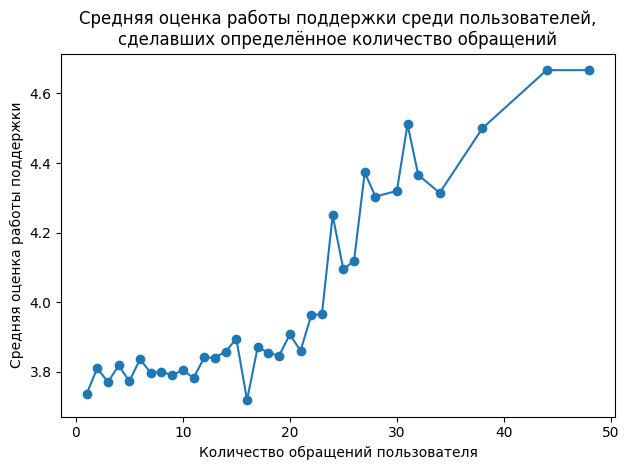

In [32]:
# Средняя оценка работы поддержки среди пользователей,
# сделавших определённое количество обращений

mean_rate = appeals.groupby("num")["rate"].mean().reset_index()
mean_rate['count'] = mean_rate["num"].map({i: np_num_requests[i] for i in range(len(np_num_requests))})
# Для точных данных берём только такие num, что больше 10 пользователей сделали столько запросов
plt.plot(mean_rate[mean_rate["count"] > 2]['num'], mean_rate[mean_rate["count"] > 2]['rate'], marker='o')
plt.xlabel("Количество обращений пользователя")
plt.ylabel("Средняя оценка работы поддержки")
plt.title("Средняя оценка работы поддержки среди пользователей,\nсделавших определённое количество обращений")

plt.tight_layout()

In [33]:
print(f"Среднее значение оценки всех пользователей, обращавшихся только один раз: {round(appeals[(appeals['num'] == 1) & (appeals['num_requests'] == 1)]['rate'].mean(), 2)}")
print(f"Среднее значение оценки всех пользователей, обращавшихся > 1 раза, в первый раз: {round(appeals[(appeals['num'] == 1) & (appeals['num_requests'] != 1)]['rate'].mean(), 2)}")
print(f"Среднее значение оценки всех пользователей, обращавшихся > 1 раза, в оставшиеся разы: {round(appeals[(appeals['num'] > 1) & (appeals['num_requests'] != 1)]['rate'].mean(), 2)}")

Среднее значение оценки всех пользователей, обращавшихся только один раз: 3.78
Среднее значение оценки всех пользователей, обращавшихся > 1 раза, в первый раз: 3.64
Среднее значение оценки всех пользователей, обращавшихся > 1 раза, в оставшиеся разы: 3.81


In [34]:
print(f"Корреляция между готовностью рекомендовать и оценкой работы поддержки: {round(appeals['rate'].corr(appeals['ready_recommend']), 2)}")

Корреляция между готовностью рекомендовать и оценкой работы поддержки: 0.74


Определим:
* как в среднем меняется оценка, если в предыдущем обращении пользователь взаимодействовал с ботом (type_closed=1), а в следующем обращении - с агентом (type_closed=0)
* как в среднем меняется оценка, если в предыдущем обращении пользователь взаимодействовал с агентом (type_closed=0), а в следующем обращении - с ботом (type_closed=1)

Анализируем связь между обращениями, если между ними прошло менее недели

In [35]:
appeals['type_closed'] = appeals['type_closed'].map({'Закрыто на агенте': 0, 'Закрыто на Чат-Боте': 1})

In [36]:
appeals = appeals.sort_values(['user_id', 'created_time'])

In [37]:
# Момент следующего обращения
appeals['next_created_time'] = appeals.groupby('user_id')['created_time'].shift(-1)

In [38]:
# Тип следующего обращения
appeals['next_type_closed'] = appeals.groupby('user_id')['type_closed'].shift(-1)

In [39]:
# Оценка при следующем обращении
appeals['next_rate'] = appeals.groupby('user_id')['rate'].shift(-1)

In [40]:
# Разница во времени между текущим обращением и следующим
appeals['time_diff'] = (appeals['next_created_time'] - appeals['created_time']).dt.days

In [41]:
# Анализируем связь между обращениями, если между ними прошло не более недели
pairs = appeals[appeals['time_diff'] < 7].copy()

In [42]:
# Разница в оценке
pairs['rate_change'] = pairs['next_rate'] - pairs['rate']

In [43]:
# Среднее изменение оценки, если в предыдущем обращении пользователь взаимодействовал
# с ботом (type_closed=1), а в следующем обращении - с агентом (type_closed=0)
bot_to_agent = pairs[(pairs['type_closed'] == 1) & (pairs['next_type_closed'] == 0)]
mean_bot_to_agent = bot_to_agent['rate_change'].mean()
print(f"Среднее изменение оценки для пар бот→агент: {round(mean_bot_to_agent, 2)}")

Среднее изменение оценки для пар бот→агент: 0.05


In [44]:
# как в среднем меняется оценка, если в предыдущем обращении пользователь взаимодействовал
# с агентом (type_closed=0), а в следующем обращении - с ботом (type_closed=1)
agent_to_bot = pairs[(pairs['type_closed'] == 0) & (pairs['next_type_closed'] == 1)]
mean_agent_to_bot = agent_to_bot['rate_change'].mean()

print(f"Среднее изменение оценки для пар агент→бот: {round(mean_agent_to_bot, 2)}")

Среднее изменение оценки для пар агент→бот: -0.16
